# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [36]:
from src.Lab_2_4_LR2 import *


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [37]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [38]:
linear_regression = LinearRegressor()
linear_regression.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [39]:
from src.Lab_2_4_LR2 import evaluate_regression

In [40]:
# Obtain regression performance metrics
y_prediccion = linear_regression.predict(x)
evaluation_metrics = evaluate_regression(y, y_prediccion)
print(evaluation_metrics)

{'R2': np.float64(0.9201359388275276), 'RMSE': np.float64(1.012647295683223), 'MAE': np.float64(0.8945454545454539)}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [41]:
data = pd.read_csv("../data/synthetic_dataset.csv")

# TODO: Obtain inputs and output from data
# uso .values para convertir en matrices de numpy 
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [42]:
# TODO: Train linear regression model
linear_regression = LinearRegressor()
linear_regression.fit(X, y)

In [43]:

# TODO: Obtain and print the regression performance metrics
y_prediccion = linear_regression.predict(X)
metrics = evaluate_regression(y, y_prediccion)
metrics

{'R2': np.float64(0.5452814241832913),
 'RMSE': np.float64(3.1936452748702813),
 'MAE': np.float64(2.2373945210247843)}

If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

Al verificar los residuos utilizando histogramas, gráficos Q-Q y diagramas de dispersión, podemos detectar no normalidad de los residuos (si los residuos estan distribuidos normalmente puede signifcar que los errores del modelo son aleatorios), heterocedasticidad(varianza desigual, lo cual puede implicar relaciones no lineales faltantes), sesgo sistemático (si patron entre residuos y datos de entrada), especificación incorrecta del modelo (si los residuos no están centrados alrededor del 0).

In [44]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    # TODO: Calculate residuals
    residuals = data[output_column] - data[prediction_column]
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='blue')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # TODO: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)     
    plt.title('Q-Q Plot of Residuals')

    # TODO: Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(data[output_column], residuals, alpha=0.5)
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col], residuals, alpha=0.5)
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

{'x1': np.float64(-0.0019118098357402448), 'x2': np.float64(-0.005980294661835375), 'x3': np.float64(1.6303240019912557), 'x4': np.float64(3.059308730603961)}


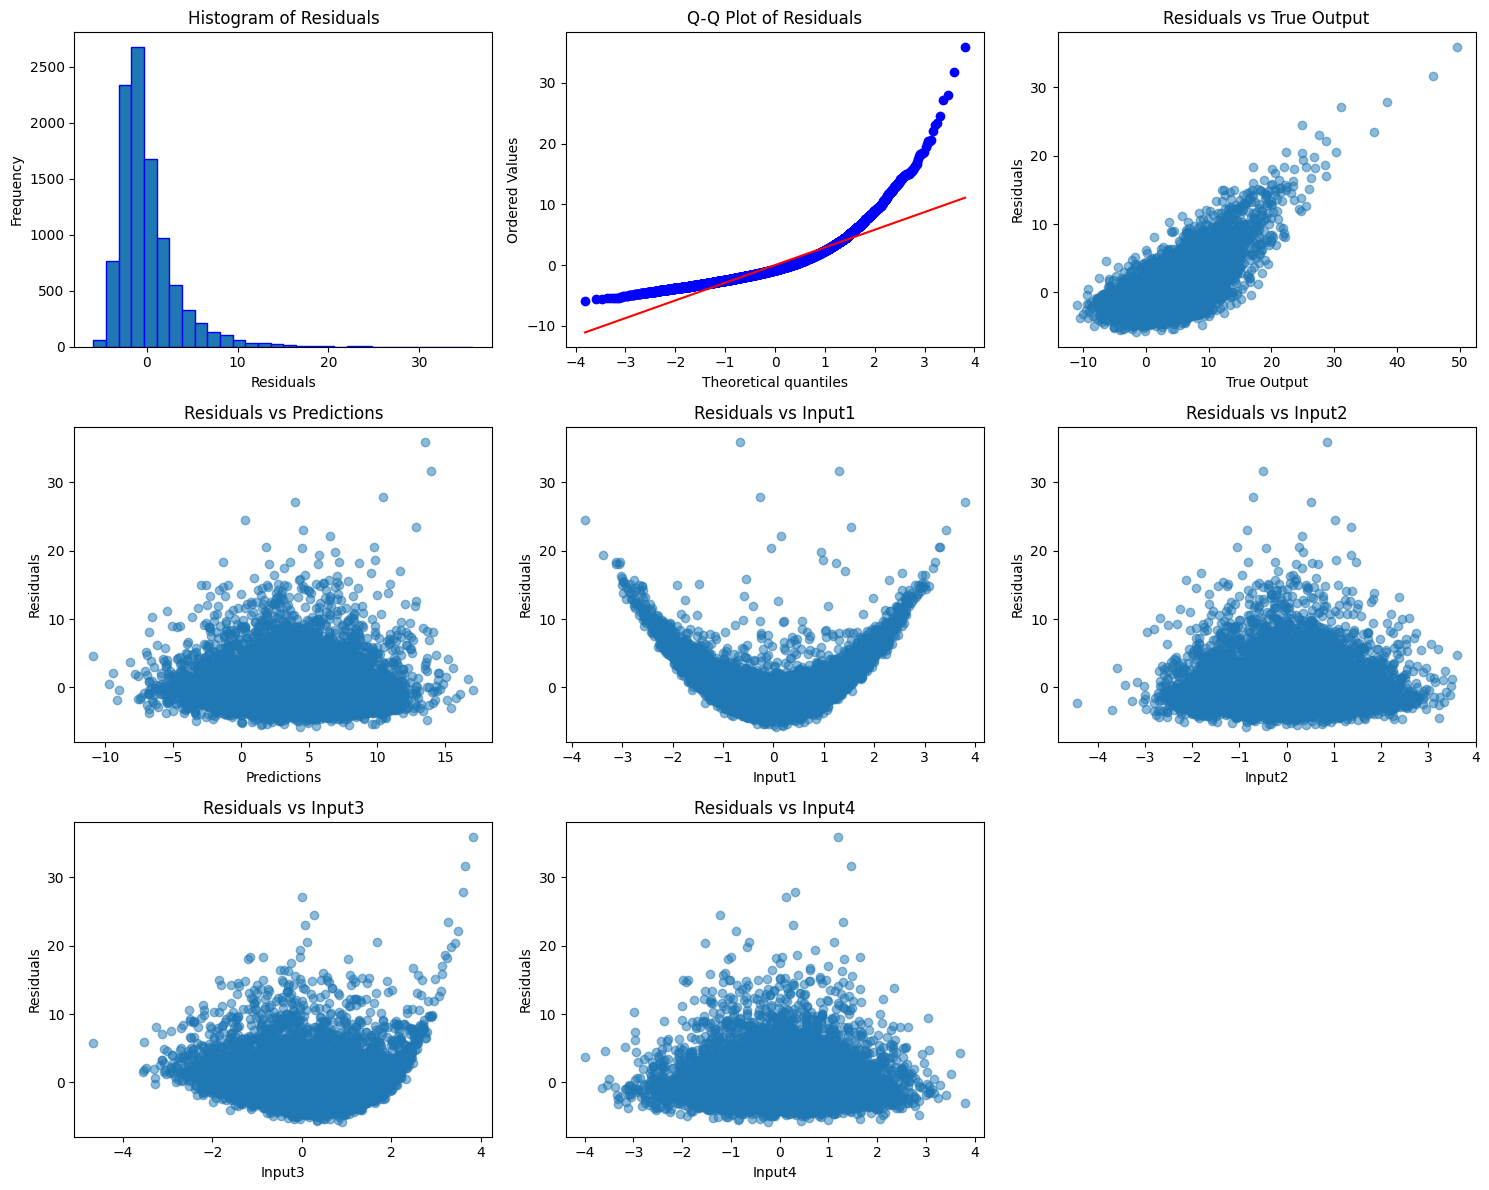

In [45]:
# TODO:  First, construct a dictionary of the coefficients to print them
coef_dict = {}
for i, coef in enumerate(linear_regression.coefficients):
    coef_dict[f"x{i+1}"] = coef
print(coef_dict)

# Plot the residuals for the predictions
data["Predictions"] = linear_regression.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
En el histograma de residuos se observa asimetría positiva (postive skew), la cola del lado derecho de la distribuación de datos es más larga que la del lado izquierdo, esto puede significar que se subestima algunos valores. (querríamos una normal alrededor del 0). 
Además en el QQ plot vemos que los valores se desvían mucho de la línea roja lo que indica que no hay normalidad en los residuos. 
En el gráfico de Residuals vs Output y los gráficos Residuals vs Predicciones se ve que el modelo no rinde bien a la hora de predecir valores altos de la salida, esto implica no homocedasticidad. (lo residuos dependen de lo valores de salida).
Por último, se ve patrones no aleatorios en los gráficos Residuals vs Inputs, en particular en Residuals vs Inputs1 se puede ver una cuadrática. Esto significa que el modelo puede estar perdiendo relaciones entre las variables de entrada y de salida. (modelo demasiado simple, subajuste) 



As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [46]:
# TODO
input1 = data["Input1"]
input3 = data["Input3"]
input4 = data["Input4"]
output = data["Output"]

data_transf = pd.DataFrame({'Input1': input1 ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(input3),
                            'Input3': input4,
                            'Output': output})
X_transf = data_transf.iloc[:,:3].values

# Train linear regression model
linear_regression = LinearRegressor()
linear_regression.fit(X_transf, y)

# Evaluate the metrics to see the behavior
y_prediccion = linear_regression.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_prediccion)
print(evaluation_metrics)

{'R2': np.float64(0.9557524745534756), 'RMSE': np.float64(0.9962304737909358), 'MAE': np.float64(0.7956340344398113)}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
Ahora los residuos siguen una distribución más normal y simétrica, sin el negative skew de antes.
El QQ plot muestra una mejor alineación con la normalidad, reduciendo el impacto de valores en los extremos.
Las relaciones entre residuos y salida , y residuos predicciones, es más aleatoria, indicando menor heterocedasticidad.
Aun asía cabe destacar que todavía hay cierta estructura en algunas variables de entrada, lo que sugiere que el modelo se podría mejorar aun más, pero el modelo actual ya reduce mucho el sesgo sistemático y es un buen modelo en general .

{'Input1': np.float64(1.9985407741302774), 'Input2': np.float64(0.995125930021854), 'Input3': np.float64(2.9880699293625486)}


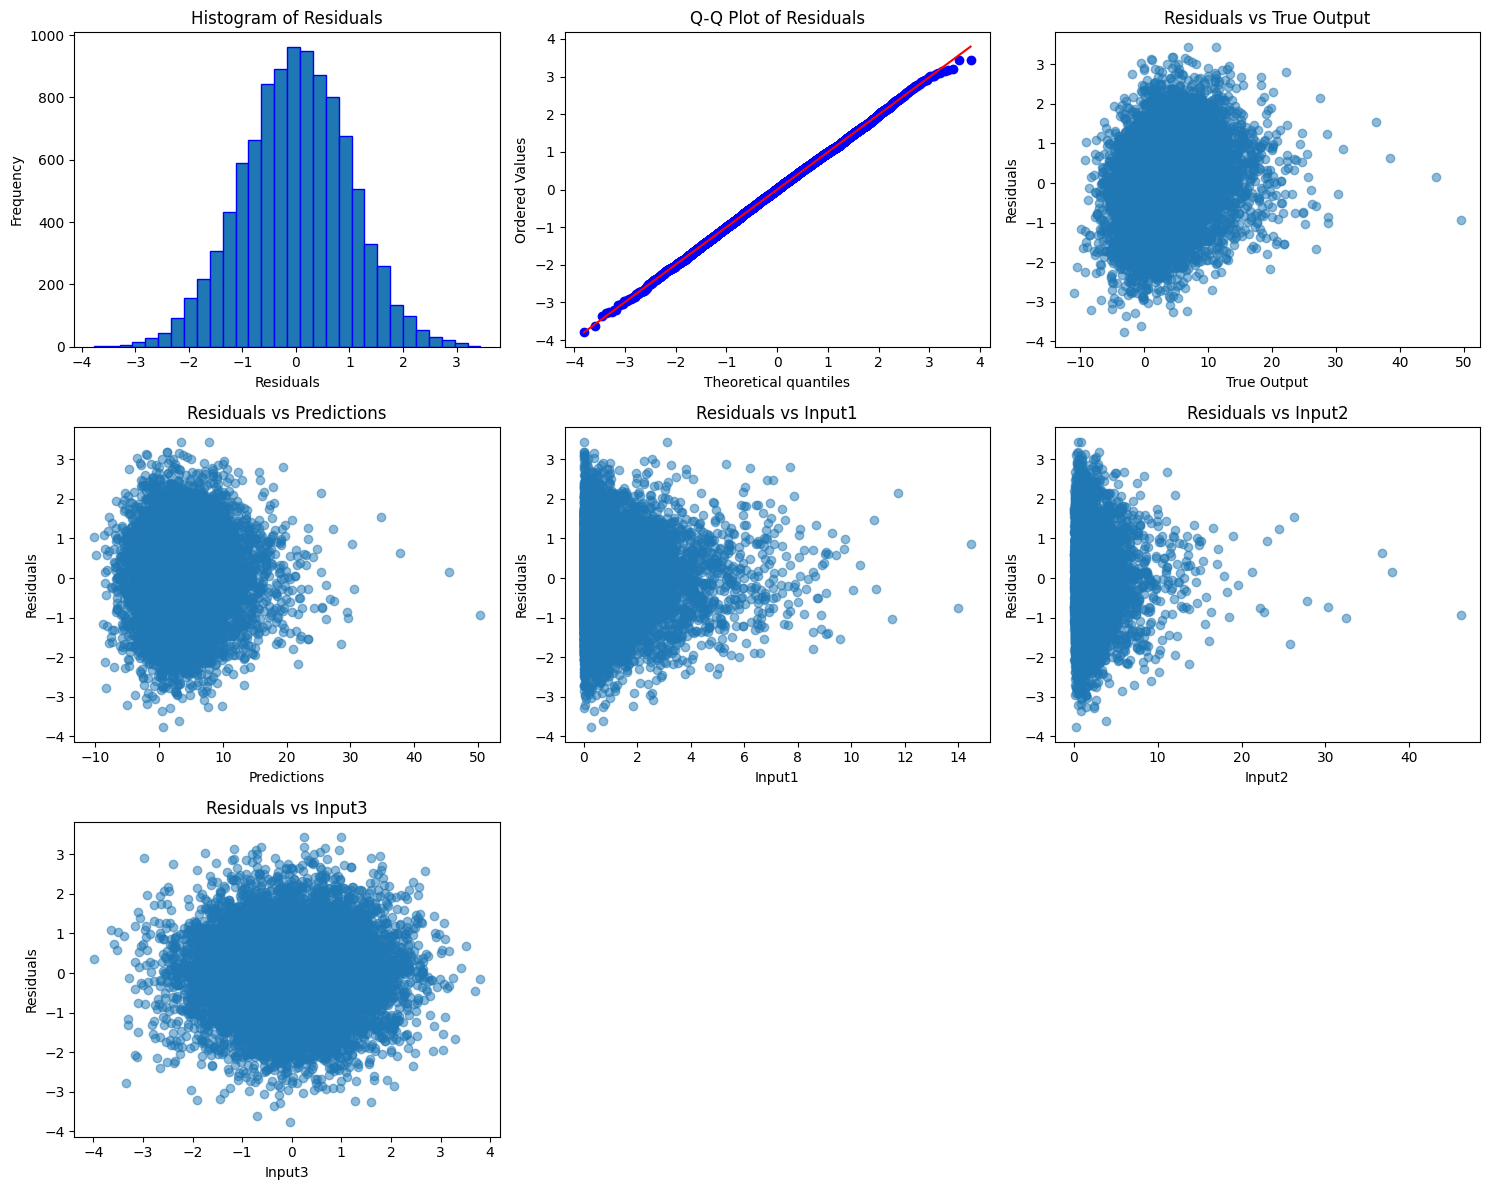

In [47]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linear_regression.coefficients)}
print(coef_dict)
data_transf["Predictions"] = linear_regression.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [48]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [49]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_prediccion = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_prediccion)
print(evaluation_metrics)

{'R2': np.float64(0.7509130345985207), 'RMSE': np.float64(6041.6796511744515), 'MAE': np.float64(4170.886894163564)}


Compare yourself with scikit

In [50]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# TODO: One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data,drop_first=True) # para evitar la multicolinealidad usamos drop-first (correlacion entre variables si todas categorias 1/0)

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_prediccion = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_prediccion)
print(evaluation_metrics)


{'R2': np.float64(0.7509130345985207), 'RMSE': np.float64(6041.6796511744515), 'MAE': np.float64(4170.8868941635865)}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

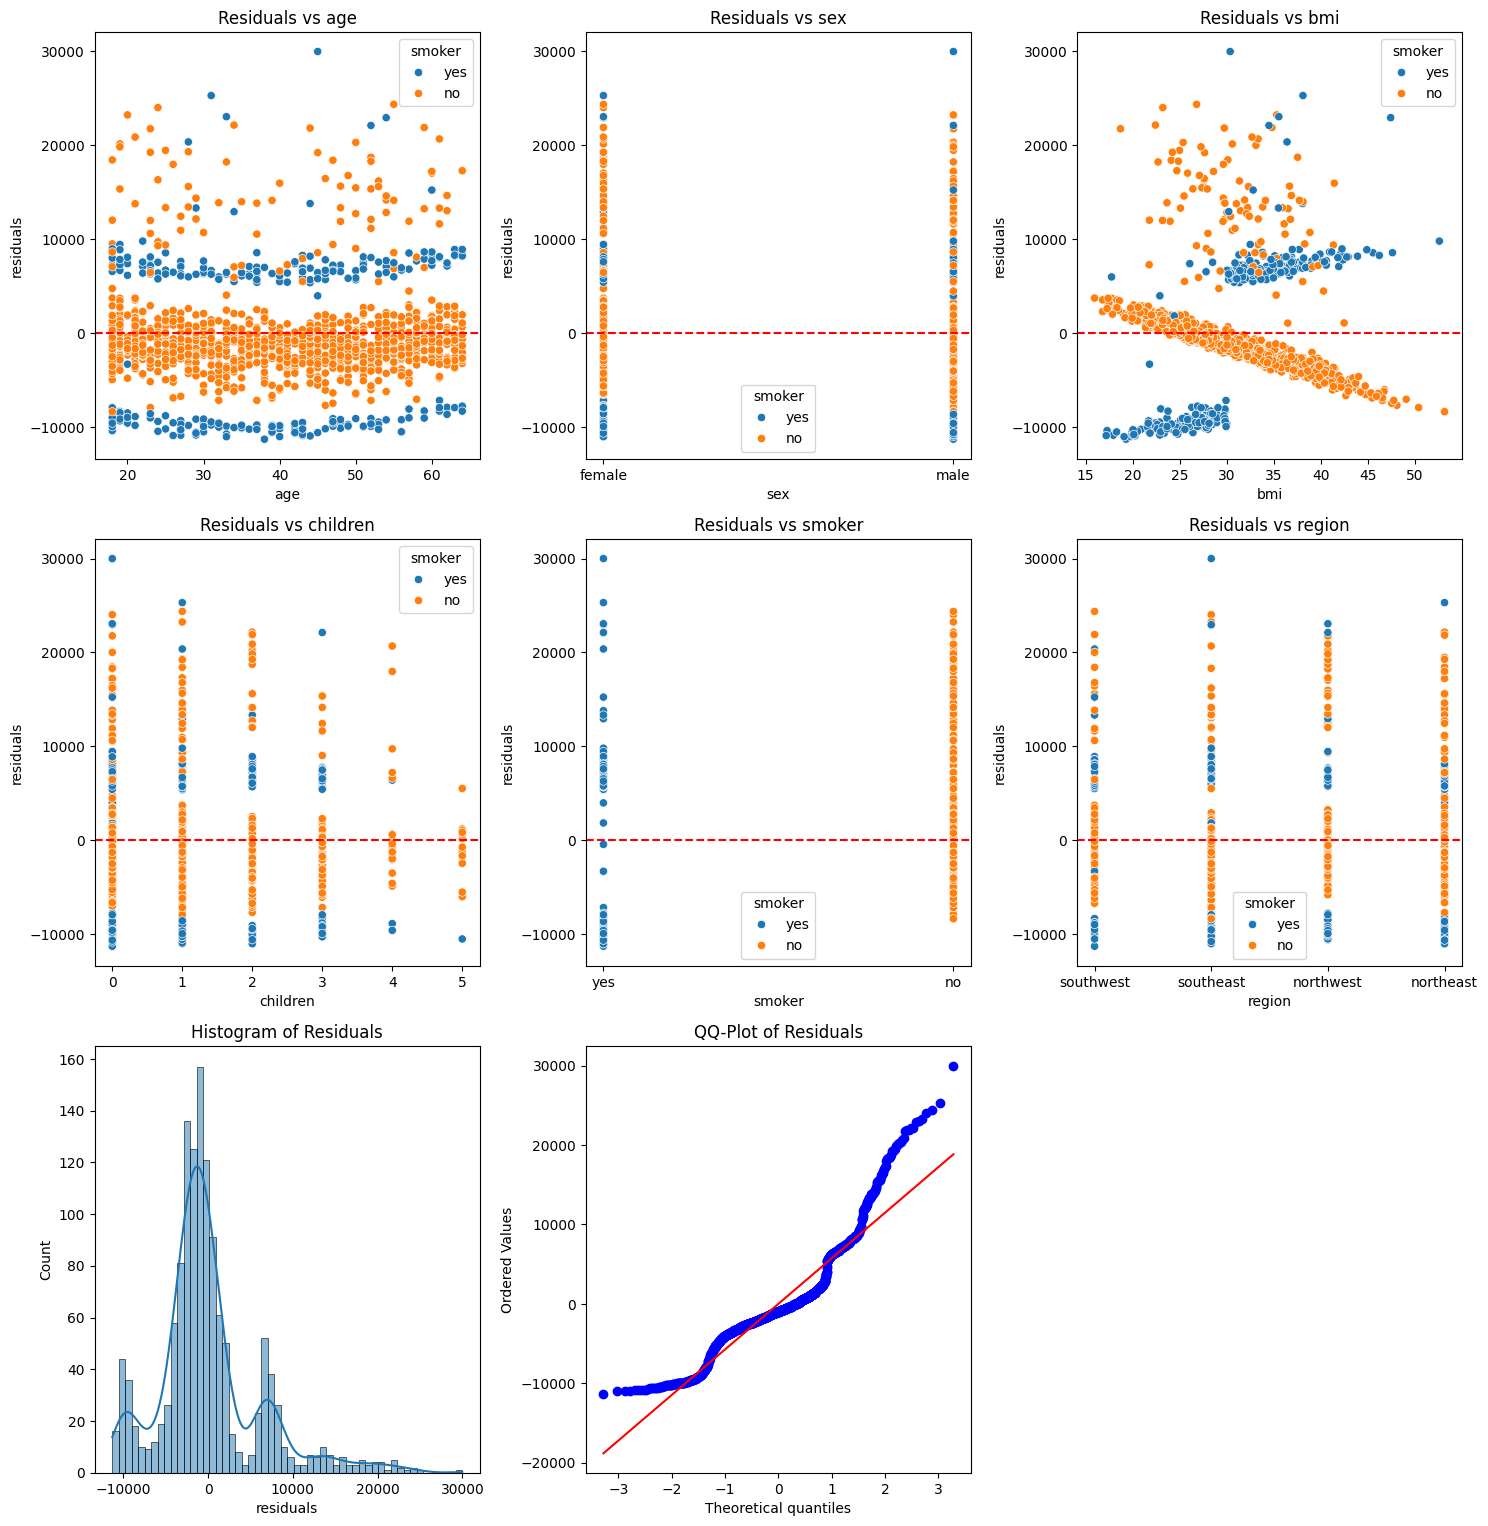

In [51]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # TODO: As before, calculate residuals
    salida = data[output_column]
    prediccion = data[prediction_column] 
    data['residuals'] = salida - prediccion

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # TODO: Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax ,hue = data[categorical_var])
        else:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> En el gráfico residuals vs age vemos que no hay una tendencia clara, aunque los fumadores parecen tener residuos más grandes y los residuos están alrededor del 0, lo cual es señal de un buen modelo. De forma parecida, la gráfica de Residuals vs BMI también muestra residuos mas dispersos para valores más altos.
Los gráficos Residuals vs sex,children,region no parecen demostrar patrones fuertes. 
Por otro lado, el gráfico Residuals vs smoker muestra que los fumadores tiene residuos mucho más dispersos lo que significa que el modelo puede tener problemas prediciendo con los fumadores.
Por útimo, el histograma se observa una distribucion sesgada a la derecha (positive skew) que puede significar que el modelo subestima costos, y el QQPlot muestra que los residuos no siguen una normal lo que puede significar que los errores no son aleatorios (probablemente estos errores se expliquen con las tendencias explicadas en cada uno de lo gráficos analizados anteriormente)
 

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [52]:
X_encoded

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], shape=(1338, 8))

In [53]:
modelo = LinearRegressor()


modelo.fit(X_encoded,y,'gradient_descent',learning_rate=0.0001, iterations= 1000000)

predictions = modelo.predict(X_encoded)

evaluate_regression(y,predictions) 


Epoch 0: MSE = 322632252.1325092
Epoch 1000: MSE = 127669482.30137351
Epoch 2000: MSE = 124781678.46648382
Epoch 3000: MSE = 122000152.04136293
Epoch 4000: MSE = 119318535.23106152
Epoch 5000: MSE = 116731378.53889231
Epoch 6000: MSE = 114233941.08735116
Epoch 7000: MSE = 111822033.63397087
Epoch 8000: MSE = 109491900.84044763
Epoch 9000: MSE = 107240132.79024583
Epoch 10000: MSE = 105063598.30738409
Epoch 11000: MSE = 102959394.53251666
Epoch 12000: MSE = 100924808.62906879
Epoch 13000: MSE = 98957288.54654852
Epoch 14000: MSE = 97054420.55289787
Epoch 15000: MSE = 95213911.83183454
Epoch 16000: MSE = 93433576.875869
Epoch 17000: MSE = 91711326.729278
Epoch 18000: MSE = 90045160.37619248
Epoch 19000: MSE = 88433157.7482594
Epoch 20000: MSE = 86873473.95983231
Epoch 21000: MSE = 85364334.47802283
Epoch 22000: MSE = 83904031.00895466
Epoch 23000: MSE = 82490917.93666784
Epoch 24000: MSE = 81123409.19217318
Epoch 25000: MSE = 79799975.46073669
Epoch 26000: MSE = 78519141.65827115
Epoch 2

{'R2': np.float64(0.7507870905640324),
 'RMSE': np.float64(6043.206863466839),
 'MAE': np.float64(4151.544200921598)}

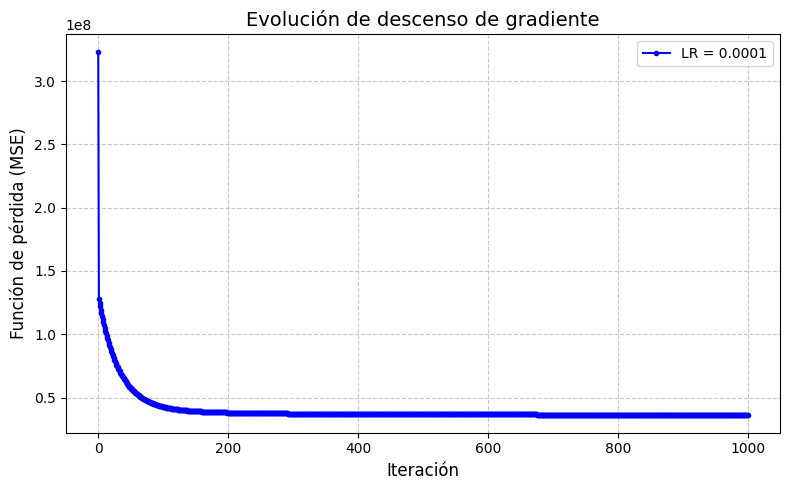

In [54]:

xs = np.arange(len(modelo.historial_formula)) #datos del historial de pérdida

#graficamos de la progresión del descenso de gradiente
plt.figure(figsize=(8, 5))  
plt.plot(xs, modelo.historial_formula, linestyle='-', marker='o', markersize=3, label=f'LR = {0.0001}', color='b')

plt.title('Evolución de descenso de gradiente', fontsize=14)
plt.xlabel('Iteración', fontsize=12)
plt.ylabel('Función de pérdida (MSE)', fontsize=12)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
#deberiamos ver como el loss disminye porque se va ajustando 


C:\Users\javim\AppData\Local\Temp\ipykernel_5260\1023565142.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\javim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


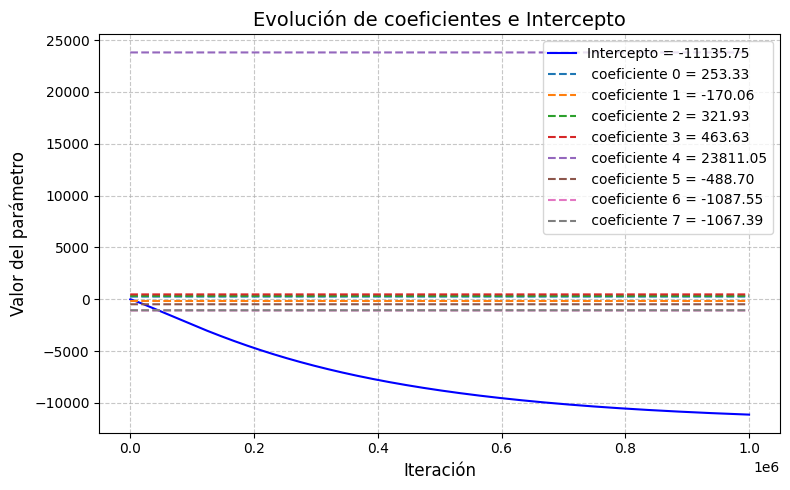

In [55]:
import matplotlib.pyplot as plt

# Número de iteraciones basadas en el historial
num_iterations = len(modelo.historial_intercepto)
xs = np.arange(num_iterations)

plt.figure(figsize=(8, 5))

# Graficar la evolución del intercepto
plt.plot(xs, modelo.historial_intercepto, linestyle='-', label=f'Intercepto = {modelo.intercept:.2f}', color='b')

# Verificamos si hay historial de coeficientes
if hasattr(modelo, "historial_coeficientes"):
    # Convertimos el historial de coeficientes a un array numpy
    y_n = np.array(modelo.historial_coeficientes)  # Debe ser una matriz de tamaño (num_iterations, num_coeficientes)
    
    # Graficamos la evolución de cada coeficiente
    for i in range(y_n.shape[1]):  # Iterar sobre columnas (coeficientes)
        plt.plot(xs, y_n[:, i], linestyle='--', label=f' coeficiente {i} = {modelo.coefficients[i]:.2f}')

plt.title('Evolución de coeficientes e Intercepto', fontsize=14)
plt.xlabel('Iteración', fontsize=12)
plt.ylabel('Valor del parámetro', fontsize=12)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\javim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


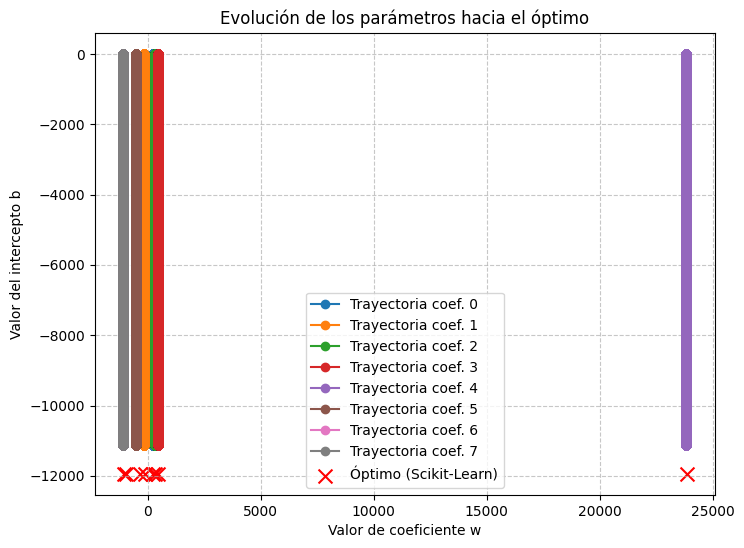

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

modelo_scikit = LinearRegression()
modelo_scikit.fit(X_encoded, y)  

#convertimos historial de coeficientes e intercepto a numpy arrays
w_history = np.array(modelo.historial_coeficientes)   
b_history = np.array(modelo.historial_intercepto)   

w_opt = modelo_scikit.coef_   
b_opt = modelo_scikit.intercept_  
 
#creamos un array con el mismo tamaño que w_opt pero con valores de b_opt
b_opt_array = np.full_like(w_opt, b_opt)

plt.figure(figsize=(8, 6))

for i in range(w_history.shape[1]):  
    plt.plot(w_history[:, i], b_history, 'o-', label=f'Trayectoria coef. {i}')

#graficamos el punto óptimo de scikit-learn
plt.scatter(w_opt, b_opt_array, color='red', marker='x', s=100, label='Óptimo (Scikit-Learn)')

plt.xlabel('Valor de coeficiente w')
plt.ylabel('Valor del intercepto b')
plt.title('Evolución de los parámetros hacia el óptimo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()
